In [28]:
import numpy as np
from smt.surrogate_models import KRG, RBF
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import statistics as st

In [29]:
training_df = pd.read_csv('Monte_Carlo_10000/training_data_bending.csv')

In [30]:
X = training_df[['outer_wall_thickness', 'inside_wall_side_thickness', 'inside_wall_middle_thickness', 'height', 'width', 'sigma0', 'youngs']].values
Y = training_df[['mean_force']].values

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [31]:
d0_values = np.linspace(0.0001, 1000, 1000)
results = {}

for i in range(len(d0_values)):
    RBF_model = RBF(d0=d0_values[i])
    RBF_model.set_training_values(X_train, Y_train)
    RBF_model.train()
    Y_pred = RBF_model.predict_values(X_val)
    mape = mean_absolute_percentage_error(Y_val, Y_pred)
    results[d0_values[i]] = mape*100

xmax = min(results, key=results.get)
ymax = results[xmax]

"""plt.figure(dpi=300)
plt.ylim(0.6, 1.6)
plt.plot(results.keys(), results.values(), lw=4)
plt.plot(min(results, key=results.get), min(results.values()), 'ro', markersize=12)
plt.annotate(f'({xmax:.0f}, {ymax:.2f}%)', xy=(xmax, ymax), xytext=(xmax+18, ymax-0.1), fontsize=22)
plt.xlabel('d0', fontsize=22)
plt.ylabel('MAPE [%]', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid()
plt.show()"""

___________________________________________________________________________
   
                                    RBF
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 80
   
___________________________________________________________________________
   
 Training
   
   Training ...
      Initializing linear solver ...
         Performing LU fact. (80 x 80 mtx) ...
         Performing LU fact. (80 x 80 mtx) - done. Time (sec):  0.0004280
      Initializing linear solver - done. Time (sec):  0.0004840
      Solving linear system (col. 0) ...
         Back solving (80 x 80 mtx) ...
         Back solving (80 x 80 mtx) - done. Time (sec):  0.0002220
      Solving linear system (col. 0) - done. Time (sec):  0.0002341
   Training - done. Time (sec):  0.0014112
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 20
   
   Predicting ...
   Pre

"plt.figure(dpi=300)\nplt.ylim(0.6, 1.6)\nplt.plot(results.keys(), results.values(), lw=4)\nplt.plot(min(results, key=results.get), min(results.values()), 'ro', markersize=12)\nplt.annotate(f'({xmax:.0f}, {ymax:.2f}%)', xy=(xmax, ymax), xytext=(xmax+18, ymax-0.1), fontsize=22)\nplt.xlabel('d0', fontsize=22)\nplt.ylabel('MAPE [%]', fontsize=22)\nplt.xticks(fontsize=22)\nplt.yticks(fontsize=22)\nplt.grid()\nplt.show()"

In [32]:
RBF_model = RBF(d0=min(results, key=results.get))
RBF_model.set_training_values(X_train, Y_train)
RBF_model.train()

___________________________________________________________________________
   
                                    RBF
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 80
   
___________________________________________________________________________
   
 Training
   
   Training ...
      Initializing linear solver ...
         Performing LU fact. (80 x 80 mtx) ...
         Performing LU fact. (80 x 80 mtx) - done. Time (sec):  0.0000899
      Initializing linear solver - done. Time (sec):  0.0001049
      Solving linear system (col. 0) ...
         Back solving (80 x 80 mtx) ...
         Back solving (80 x 80 mtx) - done. Time (sec):  0.0000222
      Solving linear system (col. 0) - done. Time (sec):  0.0000298
   Training - done. Time (sec):  0.0009301


In [33]:
Y_pred = RBF_model.predict_values(X_val)

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 20
   
   Predicting ...
   Predicting - done. Time (sec):  0.0001130
   
   Prediction time/pt. (sec) :  0.0000057
   


In [34]:
mape = mean_absolute_percentage_error(Y_val, Y_pred)
print("MAPE, for RBF:", format(round(float(mape), 4)*100,'.2f'), "%")

MAPE, for RBF: 0.26 %


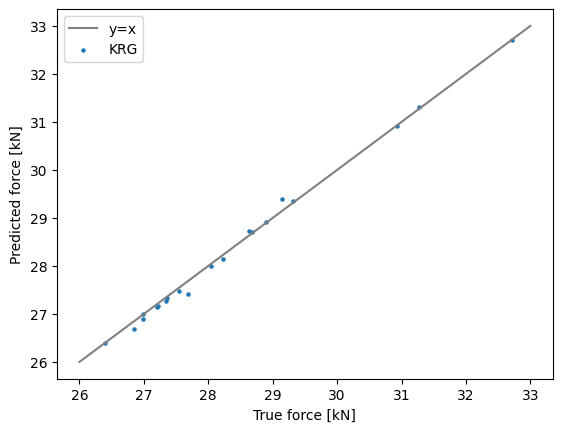

In [35]:
plt.plot([26,33], [26, 33], label='y=x', color='gray')

plt.scatter(Y_val, Y_pred, s=5, label='KRG', color='tab:blue')

plt.xlabel('True force [kN]')
plt.ylabel('Predicted force [kN]')
plt.legend()